In [6]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [1]:
import random
import pandas as pd

# Create a list of product names
products = ['Apple', 'Banana', 'Orange']

# Assign a price to each product
prices = {'Apple': 1.99, 'Banana': 0.79, 'Orange': 2.49}

# Create a list of transaction data
data = []
for i in range(10):
    transaction = {
        'product': random.choice(products),
        'price': prices[random.choice(products)],
        'quantity': random.randint(1, 10),
        'date': '2022-01-0' + str(i+1),
        'total': 0
    }
    transaction['total'] = round(transaction['price'] * transaction['quantity'], 2)
    data.append(transaction)

# Create a DataFrame from the transaction data
df = pd.DataFrame(data)
df.drop(columns=['total'], inplace=True)

#df.to_excel("sales.xlsx", index=False)

In [3]:
import pandas as pd
import numpy as np
from faker import Faker

# Initialize the Faker object
fake = Faker()

# Define the number of transactions to simulate
num_transactions = 10000

# Create empty lists to store the data
dates = []
customer_age = []
products = []
prices = []
quantities = []

# Define the product list
product_list = ["Product A", "Product B", "Product C", "Product D", "Product E", "Product F", "Product G", "Product H", "Product I", "Product J"]

# Define the price list
price_list = [10,20,30,40,50,60,70,80,90,100]

# Define the ratio of older to younger customers
old_customer_ratio = 0.2
young_customer_ratio = 0.8

# Define the average purchase value for older and younger customers
old_customer_avg_purchase = 50
young_customer_avg_purchase = 20

# Simulate the data
for _ in range(num_transactions):
    # Assign a date within the last year
    dates.append(fake.date_between(start_date='-1y', end_date='today'))
    # Assign a random age to the customer
    customer_age.append(fake.random_int(min=18, max=80))
    # Assign a random product to the customer
    products.append(np.random.choice(product_list))
    # Assign the corresponding price to the product
    prices.append(price_list[product_list.index(products[-1])])
    # Assign a random quantity to the customer
    if customer_age[_] < 40:
        # Assign a quantity based on the young customer average purchase value
        quantities.append(np.random.normal(young_customer_avg_purchase / prices[-1],1))
    else:
        # Assign a quantity based on the old customer average purchase value
        quantities.append(np.random.normal(old_customer_avg_purchase / prices[-1],1))

transactions_df = pd.DataFrame({'date': dates, 'customer_age': customer_age, 'product': products, 'price': prices, 'quantity': quantities})
transactions_df["quantity"] = transactions_df["quantity"].apply(lambda x: x if x>0 else 0)
transactions_df.head()

,date,customer_age,product,price,quantity
0,2022-10-02,28,Product H,80,1.558574
1,2022-04-23,47,Product A,10,5.244605
2,2022-11-16,29,Product D,40,0.570323
3,2022-08-17,75,Product G,70,1.689713
4,2022-03-31,54,Product B,20,2.513816


## Simulation - Einführende Fallstudie

Datensatz:

- alte und junge Kunden 
- über die Zeit hat sich Anteil an jungen Kunden erhöht
- Umsatz rückläufig, weil junge Kunden weniger ausgeben, d.h. andere Produkte und weniger Umsatz pro Kunde

In [2]:
import pandas as pd # Data manipulation
import numpy as np
import scipy.stats as stats # Statistical analysis; mainly distributions
from faker import Faker # Generate fake data
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [3]:
def perc_young_trend(start_perc: float, end_perc: float, n: int) -> np.ndarray:
    """
    Simulate percentage of young customers trend over time
    
    Args:
        start_perc (float): percentage of young customers at the start of the simulation
        end_perc (float): percentage of young customers at the end of the simulation
        n (int): number of time steps to simulate

    Returns:
        np.ndarray: percentage of young customers trend over time
    """
    # create a time series trend
    trend = np.linspace(start_perc, end_perc, n)
    # add some noise to the trend
    noise = np.random.normal(0, 0.06, n)

    perc = trend + noise

    # Ensure that perc is between 0 and 1
    perc = np.clip(perc, 0.01, 0.99)

    return perc

In [4]:
np.random.seed(10)

n_transactions = 10_000 # Number of transactions to simulate
start_perc_young = 0.2 # Percentage of young customers at the start of the simulation
end_perc_young = 0.7 # Percentage of young customers at the end of the simulation

# Define parameters for the young and old customers (average price, average quantity, etc.)
paras_customer = {"avg_price": [19, 39], "avg_quantity": [2, 4], "age": [22, 50]}
dist = stats.poisson # Distribution to use for the price and quantity and the age

# Fake data generator to generate
# - fake customer names
# - fake customer ages
fake = Faker(locale="de-DE")
perc_young = perc_young_trend(start_perc_young, end_perc_young, n_transactions)

data = {"customer_age": [], "customer_name": [], "customer_payment_method": [], "price": [], "quantity": [],  "wochentag": []}
for i in range(0, n_transactions):
    customer_type = np.random.choice([0, 1], p=[perc_young[i], 1-perc_young[i]])
    customer_age = dist.rvs(paras_customer["age"][customer_type]) + 7
    customer_name = fake.name()
    customer_payment_method = np.random.choice(["Kreditkarte", "Bar", "EC-Karte"])
    wochentag = np.random.choice(["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag"], p=[0.15, 0.15, 0.15, 0.15, 0.15, 0.25])
    
    # Minimum price is 1
    price = dist.rvs(paras_customer["avg_price"][customer_type]) + 1.99
    
    # Minimum quantity is 1
    quantity = dist.rvs(paras_customer["avg_quantity"][customer_type]) + 1
    total = price * quantity

    data["customer_age"].append(customer_age)
    data["customer_name"].append(fake.name())
    data["customer_payment_method"].append(customer_payment_method)
    data["price"].append(price)
    data["quantity"].append(quantity)
    data["wochentag"].append(wochentag)

# Create a DataFrame from the transaction data and translate column names to German
df = pd.DataFrame(data)
df.columns = ["Alter", "Kundenname", "Zahlungsmethode", "ø Preis", "Menge", "Wochentag"]
df = df[["Kundenname", "Alter", "Zahlungsmethode", "ø Preis", "Menge", "Wochentag"]]

# Add column "Datum" with sorted Dates from 1.1.2022 to 31.12.2022 all days must be from 10am to 8pm
df["Datum"] = pd.date_range(start="2022-01-01", end="2022-12-31", periods=n_transactions,  tz="Europe/Berlin")
df["Datum"] = df["Datum"].apply(lambda x: x.replace(hour=np.random.randint(10, 20), minute=np.random.randint(0, 60)))
df = df.sort_values(by="Datum").reset_index(drop=True)

# Split Date into two columns "Datum" and "Uhrzeit" (hh:mm:ss)
df["Uhrzeit"] = df["Datum"].apply(lambda x: x.strftime("%H:%M:%S")).astype("object")
df["Datum"] = df["Datum"].apply(lambda x: x.strftime("%d.%m.%Y"))#.astype("object")

df = df.drop(columns=["Wochentag"])
# Save to csv
#df.to_csv("../_data/transactions_fashion_avenue.csv", index=False)

df.head()

,Kundenname,Alter,Zahlungsmethode,ø Preis,Menge,Datum,Uhrzeit
0,Selim Schinke,29,EC-Karte,14.99,4,01.01.2022,10:24:44
1,Dipl.-Ing. Gudrun Hermann B.Sc.,28,Bar,17.99,4,01.01.2022,10:55:09
2,Hajo Paffrath,57,Bar,43.99,4,01.01.2022,11:25:31
3,Gabriel Riehl-Hendriks,47,Kreditkarte,36.99,3,01.01.2022,11:30:28
4,Aynur Beer-Fiebig,59,Bar,35.99,4,01.01.2022,11:46:50


In [5]:
import pandas as pd
import seaborn as sns

# read in the data
df = pd.read_csv("../_data/transactions_fashion_avenue.csv")
df = (df.astype({"Datum": "datetime64[ns]"})
        .assign(Umsatz = lambda x: x["ø Preis"] * x["Menge"])
        .assign(Preis = lambda x: x["ø Preis"])
        .assign(Wochentag = lambda x: x["Datum"].dt.day_name())
        .assign(Monat=lambda x: x["Datum"].dt.month)
        .assign(Woche=lambda x: x["Datum"].dt.week)
)
df.head()

<ipython-input-5-17f3cb617585>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  .assign(Woche=lambda x: x["Datum"].dt.week)


,Kundenname,Alter,Zahlungsmethode,ø Preis,Menge,Datum,Uhrzeit,Umsatz,Preis,Wochentag,Monat,Woche
0,Gislinde Börner,29,EC-Karte,14.99,4,2022-01-01,10:24:44,59.96,14.99,Saturday,1,52
1,Pierre Ullmann,28,Bar,17.99,4,2022-01-01,10:55:09,71.96,17.99,Saturday,1,52
2,Rainer Birnbaum,57,Bar,43.99,4,2022-01-01,11:25:31,175.96,43.99,Saturday,1,52
3,Ekaterina Binner,47,Kreditkarte,36.99,3,2022-01-01,11:30:28,110.97,36.99,Saturday,1,52
4,Prof. Mandy Riehl,59,Bar,35.99,4,2022-01-01,11:46:50,143.96,35.99,Saturday,1,52


## Simulation - Bau GmbH

In Anlehnung an New York Construction Case

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from faker import Faker
from datetime import datetime as dt
import datetime

# Set max columns to 100 for pandas
pd.set_option("display.max_columns", 100)

### Modellierung "Ostereier"

__Verzögerung__:
- Team 1: sehr gut bei Elektroarbeiten, schlecht bei Stadtpark und Ubahn
- Team 3: sehr gut bei Stadtpark, sehr schlecht bei Elektroarbeiten und Ubahn
- Team 4: sehr gut bei Ubahn 

__Kosten__:
- alle Team haben Kostenüberschreitung im Schnitt
- Team 2: überall deutliche Kostenüberschreitung überall
- Team 1: deutliche Kostenüberschreitung bei Elektroarbeiten und Stadtpark
- 

In [3]:
Faker.seed(132)
faker = Faker(locale="de_DE")




In [42]:
np.random.seed(132)

bauarten = ["Elektroarbeiten", "Baumbestand", "Landschaftsbau", "Straßenbau", "Stadtpark", "Ubahn", "Spielplatz"]
# Anteil der Bauarten (gesamt = 100%)
dist_bauarten = [0.2, 0.2, 0.2, 0.1, 0.15, 0.1, 0.05]
teams = ["Team 1", "Team 2", "Team 3", "Team 4"]
dist_team = [0.25, 0.25, 0.25, 0.25]
team2id = {team: no for no, team in enumerate(teams)}

### Dauer der Bauarbeiten
mean_duration = {"Elektroarbeiten": 50, "Baumbestand": 10, "Landschaftsbau": 20, "Straßenbau": 80, "Stadtpark": 45, "Ubahn": 128, "Spielplatz": 43}


# Durschnittliche Verzögerung der Bauarbeiten je Team
mean_verzögerung_by_team = {"Elektroarbeiten": [-5, 1, 30, 2], 
                            "Baumbestand": [2,3,4,1], 
                            "Landschaftsbau": [1,3,4,2], 
                            "Straßenbau": [2, 3, 1,50], 
                            "Stadtpark": [50, 0, -15, 0], 
                            "Ubahn": [110, 0, 50, -25], 
                            "Spielplatz": [-1, 20, 1, 4]}


# Kosten je Bauart
mean_costs = {"Elektroarbeiten": 100_000, "Baumbestand": 50_000, "Landschaftsbau": 80_000, "Straßenbau": 200_000, "Stadtpark": 150_000, "Ubahn": 500_000, "Spielplatz": 100_000}

# Durschnittliche Kostenabweichung je Bauart und Team
mean_costs_deviation = {"Elektroarbeiten": [0.1, 0.4, 0.3, 0.1], 
                        "Baumbestand": [0.1, 0.4, 0.1, 0.1], 
                        "Landschaftsbau": [0.1, 0.2, 0.3, 0.4], 
                        "Straßenbau": [0.2, 0.3, 0.1, 0.4], 
                        "Stadtpark": [0.1, 0.5, 0.2, 0.1], 
                        "Ubahn": [0.2, 0.3, 0.1, 0.4], 
                        "Spielplatz": [0.01, 0.2, 0.3, 0.1]}


n_projects = 10_000
data = {"Bauart": [], "Projekt_ID": [], "Projektname": [], "Projekt_Beginn": [], "Plan_Bau_fertig": [], "Ist_Bau_fertig": [], "Plan_Kosten": [], "Ist_Kosten":[], "Project_team": []}
counter = 0
for p in range(n_projects):
    # Project ID fake
    project_id = faker.bothify(text="??-######", letters="ABCDEFGHIJKLMNOPQRSTUVWXYZ")

    # Choose Bauart
    art = np.random.choice(bauarten, p=dist_bauarten)

    # Sample a start date
    date_start = faker.date_between(start_date="-10y", end_date="-1y", )

    # Sample a planned duration
    duration = np.random.normal(loc=mean_duration[art], scale=mean_duration[art] / 2 + 2)

    if duration <= 0:
        duration = mean_duration[art]

    # Sample a planned end date
    date_plan_end = date_start + datetime.timedelta(days=duration)

    # Sample a team
    team = np.random.choice(teams, p=dist_team)
    teamid = team2id[team]

    # Sample a delay
    delay = np.random.normal(loc=mean_verzögerung_by_team[art][teamid], scale=abs(mean_verzögerung_by_team[art][teamid]) / 3 + 1)
    date_act_end = date_plan_end + datetime.timedelta(days=delay)

    # add additional delay if winter
    if (date_act_end.month in [12,1,2]) and (teamid + 1 in [2]): # Winter & Team 2
        winter_delay = stats.poisson.rvs(mu=30, size=1)[0]
        #print(winter_delay, type(winter_delay), float(winter_delay))
        date_act_end = date_act_end + datetime.timedelta(days=float(winter_delay))

    if date_act_end < date_start:
        counter += 1
        date_act_end = date_plan_end + datetime.timedelta(days=np.random.normal(4))


    # Sample costs 
    costs_plan = np.random.normal(loc=mean_costs[art], scale=mean_costs[art] / 2 + 2)
    costs_deviation = np.random.normal(loc=mean_costs_deviation[art][teamid], scale=abs(mean_costs_deviation[art][teamid]) / 3 + 0.05)
    costs_act = costs_plan * (1 + costs_deviation)

    # Gather data
    data["Bauart"].append(art)
    data["Projekt_ID"].append(project_id)
    data["Projektname"].append(art + " // " + faker.street_name())
    data["Projekt_Beginn"].append(date_start)
    data["Plan_Bau_fertig"].append(date_plan_end)
    data["Ist_Bau_fertig"].append(date_act_end)
    data["Plan_Kosten"].append(np.round(costs_plan, 2))
    data["Ist_Kosten"].append(np.round(costs_act,2))
    data["Project_team"].append(team)

df = (pd.DataFrame(data)
     .astype({"Projekt_Beginn": "datetime64", "Plan_Bau_fertig": "datetime64", "Ist_Bau_fertig": "datetime64"})
     .drop(columns=["Bauart"])
     )

###### UNCLEAN DATA ######

# Rename columns
df = df.rename(columns={"Projekt_ID": "Project_ID", 
                        "Projektname": "Name Projekt", 
                        "Projekt_Beginn": "projekt_Beginn", 
                        "Plan_Bau_fertig": "Plan Bau fertig", 
                        "Ist_Bau_fertig": "Fertig_IST", 
                        "Plan_Kosten": "Kosten Plan", 
                        "Ist_Kosten": "Ist_Kosten", 
                        "Project_team": "Project_team"})


# Add duplicates (sample n rows and add them to the end) than shuffle 
df = df.append(df.sample(n=19, replace=True)).sample(frac=1).reset_index(drop=True)


# Add NaNs und NaT values
n = len(df)
idx = np.random.choice(n, size=7, replace=False)
df.loc[idx, "Plan Bau fertig"] = np.nan
idx = np.random.choice(n, size=14, replace=False)
df.loc[idx, "Kosten Plan"] = np.nan

# Add outliers 
idx = np.random.choice(n, size=7, replace=False)
df.loc[idx, "Ist_Kosten"] = 1_000_000_000 *(1+ np.random.normal(loc=0, scale=0.1, size=7))

# Store data in csv 
df.to_csv("../_data/Construction.csv", index=False)
df.head()

,Project_ID,Name Projekt,projekt_Beginn,Plan Bau fertig,Fertig_IST,Kosten Plan,Ist_Kosten,Project_team
0,OW-046312,Ubahn // Slobodan-Bohlander-Gasse,2014-03-30,2014-06-16,2014-09-08,521405.77,704593.56,Team 1
1,KW-414480,Stadtpark // Scheibeweg,2019-01-24,2019-02-27,2019-03-26,243661.31,470901.73,Team 2
2,WN-997211,Elektroarbeiten // Jopichallee,2014-09-26,2014-12-14,2015-01-10,55401.16,66040.47,Team 3
3,EN-110568,Straßenbau // Rafael-Zirme-Weg,2017-08-14,2017-10-14,2017-10-14,339986.73,368508.21,Team 3
4,LH-666331,Stadtpark // Matthäus-Dobes-Straße,2017-08-18,2017-10-10,2017-10-08,234450.85,261910.95,Team 4


### Read in Dataset

In [488]:
df = pd.read_csv("../_data/Construction.csv")
df.head()

,Projekt_ID,Projektname,Projekt_Beginn,Plan_Bau_fertig,Ist_Bau_fertig,Plan_Kosten,Ist_Kosten,Project_team
0,P-626,Stadtpark // Roswita-Berger-Ring,2014-02-21,2014-05-04,2014-05-03,109129.55,130487.07,Team 4
1,P-180,Spielplatz // Heserplatz,2017-04-21,2017-06-28,2017-06-30,59521.33,66009.97,Team 4
2,P-729,Spielplatz // Helen-Spieß-Straße,2019-11-28,2019-11-30,2020-01-19,68164.77,76972.67,Team 2
3,P-989,Baumbestand // Schäferring,2019-06-14,2019-06-19,2019-06-20,29319.17,41437.34,Team 2
4,P-318,Elektroarbeiten // Steystr.,2013-10-11,2013-12-01,2013-12-31,47894.71,67229.98,Team 3


In [474]:
df = (df
.assign(Dauer_ist = lambda x: (x["Ist_Bau_fertig"] - x["Projekt_Beginn"]).dt.days,
        Dauer_plan = lambda x: (x["Plan_Bau_fertig"] - x["Projekt_Beginn"]).dt.days,
        Verzögerung = lambda x: x["Dauer_ist"] - x["Dauer_plan"],
        Kostenabweichung_perc = lambda x: (x["Ist_Kosten"] - x["Plan_Kosten"]) / x["Plan_Kosten"],
        Kostenabweichung_eur = lambda x: x["Ist_Kosten"] - x["Plan_Kosten"],
        Monat = lambda x: x["Projekt_Beginn"].dt.month.astype("category"),
        )
)
df.head()

,Bauart,Projekt_ID,Projektname,Projekt_Beginn,Plan_Bau_fertig,Ist_Bau_fertig,Plan_Kosten,Ist_Kosten,Project_team,Dauer_ist,Dauer_plan,Verzögerung,Kostenabweichung_perc,Kostenabweichung_eur,Monat
0,Stadtpark,P-626,Stadtpark // Roswita-Berger-Ring,2014-02-21,2014-05-04,2014-05-03,109129.55,130487.07,Team 4,71,72,-1,0.195708,21357.52,2
1,Spielplatz,P-180,Spielplatz // Heserplatz,2017-04-21,2017-06-28,2017-06-30,59521.33,66009.97,Team 4,70,68,2,0.109014,6488.64,4
2,Spielplatz,P-729,Spielplatz // Helen-Spieß-Straße,2019-11-28,2019-11-30,2020-01-19,68164.77,76972.67,Team 2,52,2,50,0.129215,8807.90,11
3,Baumbestand,P-989,Baumbestand // Schäferring,2019-06-14,2019-06-19,2019-06-20,29319.17,41437.34,Team 2,6,5,1,0.413319,12118.17,6
4,Elektroarbeiten,P-318,Elektroarbeiten // Steystr.,2013-10-11,2013-12-01,2013-12-31,47894.71,67229.98,Team 3,81,51,30,0.403704,19335.27,10


In [482]:
df.groupby(["Monat"])["Verzögerung"].mean()

Monat
1     12.071680
2     10.769697
3      8.265258
4      8.381304
5      8.644366
6      9.107975
7     10.128028
8     10.421875
9     10.059902
10    11.615116
11    14.395619
12    13.665077
Name: Verzögerung, dtype: float64

In [469]:
df.groupby("Bauart").agg({"Verzögerung": "mean"})

,Verzögerung
Bauart,
Baumbestand,3.812837
Elektroarbeiten,7.769694
Landschaftsbau,4.327044
Spielplatz,7.458090
Stadtpark,10.709197
Straßenbau,17.027451
Ubahn,34.720693


In [468]:
smf.ols("Verzögerung ~ Kostenabweichung_perc + C(Monat):Project_team + Bauart", data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Verzögerung   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     45.98
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:02:50   Log-Likelihood:                -45367.
No. Observations:               10000   AIC:                         9.084e+04
Df Residuals:                    9945   BIC:                         9.124e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              11.4053      1.611      7.079      0.000       8.247      14.563
Bauart[T.Elektroarbeiten]               3.8192      0.718      5.321      0.000       2.412       5.226
Bauart[T.Landschaftsbau]               -0.3603      0.729     -0.494      0.621      -1.789       1.068
Bauart[T.Spielplatz]                    3.8911      1.122      3.469      0.001       1.692       6.090
Bauart[T.Stadtpark]                     6.2603      0.769      8.140      0.000       4.753       7.768
Bauart[T.Straßenbau]                   13.0677      0.878     14.885      0.000      11.347      14.789
Bauart[T.Ubahn]                        30.5081      0.888     34.361      0.000      28.768      32.249
Project_team[T.Team 2]                 -1.3696      2.182     -0.628      0.530      -5.646       2.907
Project_team[T.Team 3]                 -9.0898      2.239     -4.060      0.000     -13.478      -4.701
Project_team[T.Team 4]                -17.8565      2.234     -7.992      0.000     -22.236     -13.477
C(Monat)[T.2]:Project_team[Team 1]     -0.7910      2.215     -0.357      0.721      -5.133       3.551
C(Monat)[T.3]:Project_team[Team 1]     -4.0923      2.199     -1.861      0.063      -8.403       0.218
C(Monat)[T.4]:Project_team[Team 1]     -0.3734      2.207     -0.169      0.866      -4.700       3.953
C(Monat)[T.5]:Project_team[Team 1]      3.3694      2.189      1.540      0.124      -0.921       7.659
C(Monat)[T.6]:Project_team[Team 1]     -0.2175      2.277     -0.096      0.924      -4.680       4.245
C(Monat)[T.7]:Project_team[Team 1]     -0.0571      2.204     -0.026      0.979      -4.377       4.263
C(Monat)[T.8]:Project_team[Team 1]      1.6778      2.208      0.760      0.447      -2.650       6.005
C(Monat)[T.9]:Project_team[Team 1]     -2.2573      2.196     -1.028      0.304      -6.562       2.047
C(Monat)[T.10]:Project_team[Team 1]     2.5219      2.166      1.164      0.244      -1.725       6.768
C(Monat)[T.11]:Project_team[Team 1]    -3.3919      2.227     -1.523      0.128      -7.757       0.973
C(Monat)[T.12]:Project_team[Team 1]     1.2119      2.130      0.569      0.569      -2.963       5.387
C(Monat)[T.2]:Project_team[Team 2]    -10.6063      2.214     -4.791      0.000     -14.946      -6.267
C(Monat)[T.3]:Project_team[Team 2]    -14.5506      2.147     -6.778      0.000     -18.759     -10.342
C(Monat)[T.4]:Project_team[Team 2]    -14.9781      2.184     -6.858      0.000     -19.259     -10.697
C(Monat)[T.5]:Project_team[Team 2]    -15.4021      2.109     -7.304      0.000     -19.536     -11.269
C(Monat)[T.6]:Project_team[Team 2]    -14.8184      2.157     -6.869      0.000     -19.047     -10.590
C(Monat)[T.7]:Project_team[Team 2]    -13.8218      2.196     -6.29

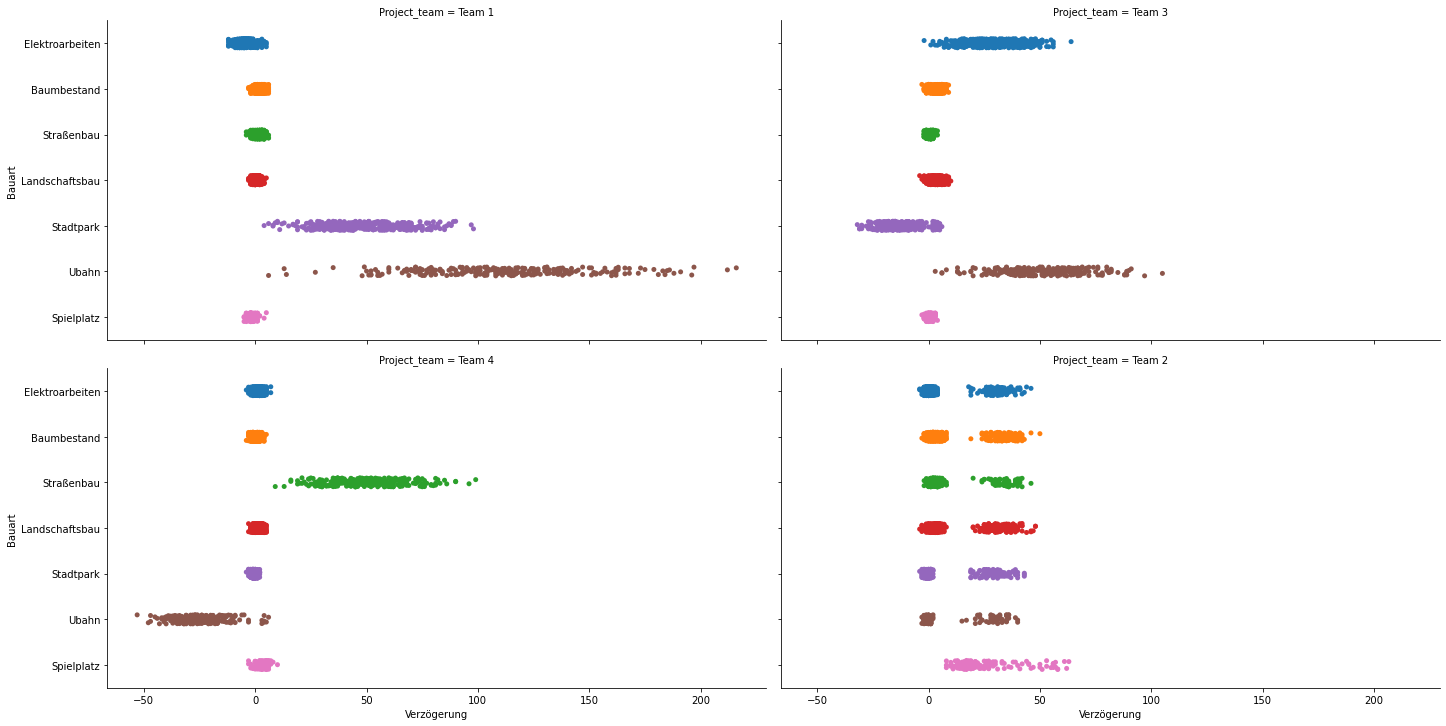

In [455]:
sns.catplot(y="Bauart", x="Verzögerung", col="Project_team", col_wrap=2,  data=df, kind="strip", height=5, aspect=2)

In [315]:
# Generate fake project names in German
def generate_project_name():
    return 

In [316]:
generate_project_name()

'Löchelstraße'

In [302]:
df = (df
        .assign(Duration=lambda x: x["Plan_Bau_fertig"] - x["Projekt_Beginn"],)
        # timedelta to int
        .assign(Duration=lambda x: x["Duration"].apply(lambda x: x.days))
)


df.groupby("Bauart").agg({"Duration": "mean"})

,Duration
Bauart,
Baumbestand,10.095238
Elektroarbeiten,56.000000
Landschaftsbau,18.684211
Spielplatz,43.750000
Stadtpark,52.833333
Straße,71.214286
Ubahn,125.923077


In [ ]:



n = 1000
for bauart in bauarten:
    for team in teams:
        # Generate random numbers from normal distribution
        mu = mean_verzögerung_by_team[bauart][int(team[-1]) - 1]
        sigma = 10
        x = stats.poisson(mu=mu, loc=0).rvs(1)
        # Create dataframe
        df = pd.DataFrame({"Verzögerung": x, "Bauart": bauart, "Team": team})
        # Save to csv
        #df.to_csv(f"../_data/verzögerung_{bauart}_{team}.csv", index=False)


In [269]:
df.head()

,Verzögerung,Bauart,Team
0,0.122569,Spielplatz,Team 4
1,9.825773,Spielplatz,Team 4
2,-24.849250,Spielplatz,Team 4
3,-3.494421,Spielplatz,Team 4
4,-5.419908,Spielplatz,Team 4


In [ ]:
anteil_bauart = [0.1, 0.2, 0.3, 0.1, 0.1, 0.1, 0.1]

verzögerung_mean_bauart = {"Elektroarbeiten": 10, "Baumbestand": 233, "Landschaftsbau": 5, 
                          "Sanitär": 40, "Stadtpark": 50, "Ubahn": 60, "Spielplatz": 100}
mehrkosten_mean_bauart = {"Elektroarbeiten": 10, "Baumbestand": 0, "Landschaftsbau": 5, "Sanitär": 40, "Stadtpark": 50, "Ubahn": 60, "Spielplatz": 70}

n = 1000

data = {"Bauart": [], "Verzögerung": [], "Mehrkosten": []}
for i in range(n):
    bauart = np.random.choice(bauarten, p=anteil_bauart)
    verzögerung = stats.poisson(verzögerung_mean_bauart[bauart]).rvs()
    mehrkosten = stats.norm(mehrkosten_mean_bauart[bauart], 10).rvs()
    data["Bauart"].append(bauart)
    data["Verzögerung"].append(verzögerung)
    data["Mehrkosten"].append(mehrkosten)



df = pd.DataFrame(data)
df.head()



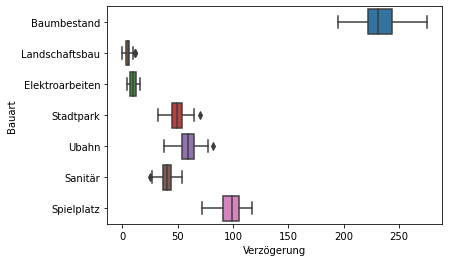

In [265]:
ax = sns.boxplot(data=df,y="Bauart", x="Verzögerung")
# rotate x-axis labels
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

<AxesSubplot:xlabel='Mehrkosten', ylabel='Count'>

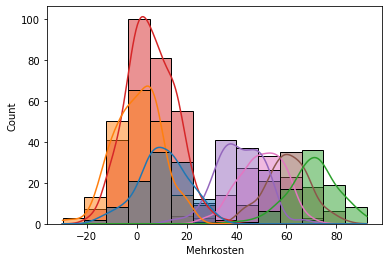

In [254]:
sns.histplot(data=df, x="Mehrkosten" , hue="Bauart",kde=True, legend=False)

In [1]:
import pandas as pd 

In [10]:
fpath = "../_data/Construction.csv"
df = pd.read_csv(fpath)
df = df.rename(columns={'Project_ID': 'id', # Spalte "Projekt_ID" wird umbenannt in "id"
                        'Projektname': 'name',
                        'projekt_Beginn': 'beginn',
                        'Plan Bau fertig': 'ende_plan',
                        'Ist_Bau_fertig': 'ende_ist',
                        'plan_Kosten': 'kosten_plan',
                        'Ist_Kosten': 'kosten_ist',
                        'Project_team': 'team'})
df["team2"] = df["team"] 
df.head()

,id,name,beginn,ende_plan,ende_ist,kosten_plan,kosten_ist,team,team2
0,P-62602,Stadtpark // Eberhardtallee,2013-10-15,2013-12-26,2013-12-25,109129.55,130487.07,Team 4,Team 4
1,P-80374,Spielplatz // Geißlerweg,2016-07-14,2016-09-20,2016-09-22,59521.33,66009.97,Team 4,Team 4
2,P-96379,Spielplatz // Schäferring,2019-06-14,2019-06-16,2019-06-29,82572.27,107571.64,Team 2,Team 2
3,P-31809,Baumbestand // Raphaela-Scheel-Platz,2019-02-06,2019-02-11,2019-02-11,29563.59,29724.17,Team 1,Team 1
4,P-51445,Landschaftsbau // Julia-Neureuther-Platz,2015-04-26,2015-05-16,2015-05-20,38315.35,53783.40,Team 3,Team 3


In [11]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False])

In [18]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3, 4,1],
    'B': [5, 6, 7, 8, 5],
    'C': [1, 2, 3, 4, 1]
})

df.duplicated()

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [30]:
# List of Tuples
students = [
    ('Ankit', 34, 'Uttar pradesh', 34),
    ('Riti', 30, 'Delhi', 30),
    ('Aadi', 16, 'Delhi', 16),
    ('Riti', 30, 'Delhi', 30),
    ('Riti', 30, 'Delhi', 30),
    ('Riti', 30, 'Mumbai', 30),
    ('Ankita', 40, 'Bihar', 40),
    ('Sachin', 30, 'Delhi', 30)
]

# Create a DataFrame object
df = pd.DataFrame(students, columns=['Name', 'Age', 'Domicile', 'Marks'])
idx = df.T.duplicated(keep="last") == False
df.loc[:,idx]

,Name,Domicile,Marks
0,Ankit,Uttar pradesh,34
1,Riti,Delhi,30
2,Aadi,Delhi,16
3,Riti,Delhi,30
4,Riti,Delhi,30
5,Riti,Mumbai,30
6,Ankita,Bihar,40
7,Sachin,Delhi,30


In [34]:
example = pd.DataFrame({'Spalte A': [1, 2, 3, 2, 4, 5],
                   'Spalte B': ['Hund', 'Katze', 'Vogel', 'Katze', 'Fisch', 'Vogel'],
                   'Spalte C': [1, 2, 3, 2, 4, 5]})
example.head()

example.drop_duplicates??

Signature:
example.drop_duplicates(
    subset: Union[Hashable, Sequence[Hashable], NoneType] = None,
    keep: Union[str, bool] = 'first',
    inplace: bool = False,
    ignore_index: bool = False,
) -> Union[ForwardRef('DataFrame'), NoneType]
Source:   
    def drop_duplicates(
        self,
        subset: Optional[Union[Hashable, Sequence[Hashable]]] = None,
        keep: Union[str, bool] = "first",
        inplace: bool = False,
        ignore_index: bool = False,
    ) -> Optional["DataFrame"]:
        """
        Return DataFrame with duplicate rows removed.

        Considering certain columns is optional. Indexes, including time indexes
        are ignored.

        Parameters
        ----------
        subset : column label or sequence of labels, optional
            Only consider certain columns for identifying duplicates, by
            default use all of the columns.
        keep : {'first', 'last', False}, default 'first'
            Determines which duplicates (if any) t